Vertices: 1, Edges: 0, Time taken: 0.00000 ms
Vertices: 2, Edges: 0, Time taken: 0.00000 ms
Vertices: 3, Edges: 1, Time taken: 0.00000 ms
Vertices: 4, Edges: 2, Time taken: 0.00000 ms
Vertices: 5, Edges: 4, Time taken: 0.00000 ms
Vertices: 6, Edges: 6, Time taken: 0.00000 ms
Vertices: 7, Edges: 8, Time taken: 0.00000 ms
Vertices: 8, Edges: 11, Time taken: 0.00000 ms
Vertices: 9, Edges: 14, Time taken: 0.00000 ms
Vertices: 10, Edges: 18, Time taken: 0.00000 ms
Vertices: 11, Edges: 22, Time taken: 0.00000 ms
Vertices: 12, Edges: 26, Time taken: 0.00000 ms
Vertices: 13, Edges: 31, Time taken: 0.00000 ms
Vertices: 14, Edges: 36, Time taken: 0.00000 ms
Vertices: 15, Edges: 42, Time taken: 0.00000 ms
Vertices: 16, Edges: 48, Time taken: 1.00017 ms
Vertices: 17, Edges: 54, Time taken: 0.00000 ms
Vertices: 18, Edges: 61, Time taken: 1.00851 ms
Vertices: 19, Edges: 68, Time taken: 0.00000 ms
Vertices: 20, Edges: 76, Time taken: 0.00000 ms
Vertices: 21, Edges: 84, Time taken: 1.00064 ms
Vertices

Vertices: 171, Edges: 5814, Time taken: 5.13577 ms
Vertices: 172, Edges: 5882, Time taken: 4.00066 ms
Vertices: 173, Edges: 5951, Time taken: 3.99947 ms
Vertices: 174, Edges: 6020, Time taken: 4.00090 ms
Vertices: 175, Edges: 6090, Time taken: 5.00298 ms
Vertices: 176, Edges: 6160, Time taken: 6.53005 ms
Vertices: 177, Edges: 6230, Time taken: 6.42729 ms
Vertices: 178, Edges: 6301, Time taken: 5.87106 ms
Vertices: 179, Edges: 6372, Time taken: 5.00131 ms
Vertices: 180, Edges: 6444, Time taken: 4.13156 ms
Vertices: 181, Edges: 6516, Time taken: 4.00090 ms
Vertices: 182, Edges: 6588, Time taken: 5.00083 ms
Vertices: 183, Edges: 6661, Time taken: 4.53377 ms
Vertices: 184, Edges: 6734, Time taken: 5.11384 ms
Vertices: 185, Edges: 6808, Time taken: 5.15580 ms
Vertices: 186, Edges: 6882, Time taken: 5.16891 ms
Vertices: 187, Edges: 6956, Time taken: 5.16224 ms
Vertices: 188, Edges: 7031, Time taken: 5.01633 ms
Vertices: 189, Edges: 7106, Time taken: 5.00059 ms
Vertices: 190, Edges: 7182, Tim

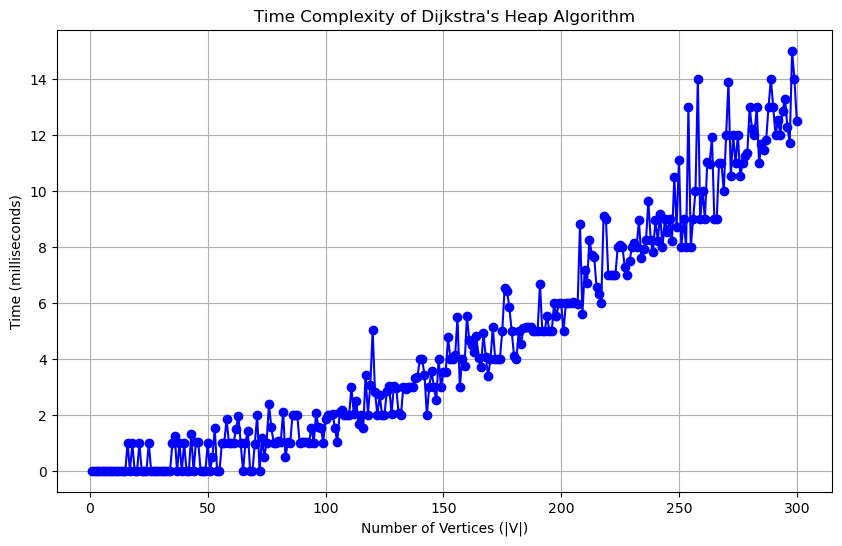

In [2]:
import heapq
import random
import time
import matplotlib.pyplot as plt

# Dijkstra's algorithm implementation using adjacency list
def dijkstra(graph, V, source):
    # Initialize distances to all vertices as infinity
    dist = {i: float('inf') for i in range(V)}
    dist[source] = 0  # Distance to the source is 0
    
    # Previous node array (to store shortest path tree)
    prev = {i: None for i in range(V)}
    
    # Set of vertices for which the shortest distance is already found
    S = {i: 0 for i in range(V)}  # All vertices are initially unvisited
    
    # Priority queue (min-heap) initialized with the source node
    priority_queue = []
    heapq.heappush(priority_queue, (0, source))  # (distance, vertex)
    
    while priority_queue:
        # Extract the vertex with the minimum distance
        current_dist, u = heapq.heappop(priority_queue)
        
        # If this vertex has already been visited, skip it
        if S[u] == 1:
            continue
        
        # Mark u as visited (add to S)
        S[u] = 1
        
        # For each neighbor (v, weight) of u
        for v, weight in graph[u]:
            # Relaxation: check if a shorter path is found
            if S[v] == 0 and dist[v] > dist[u] + weight:
                dist[v] = dist[u] + weight  # Update distance
                prev[v] = u  # Update predecessor
                
                # Insert v into the priority queue
                heapq.heappush(priority_queue, (dist[v], v))
    
    return dist, prev

# Generate a random graph with V vertices and E edges as an adjacency list
def generate_graph(V, E):
    graph = {i: [] for i in range(V)}
    edges_added = 0
    while edges_added < E:
        u = random.randint(0, V - 1)
        v = random.randint(0, V - 1)
        if u != v and all(v != edge[0] for edge in graph[u]):
            weight = random.randint(1, 10)
            graph[u].append((v, weight))  # Directed edge (u -> v)
            edges_added += 1
    return graph

# Empirical time complexity analysis and graph plotting
def analyze_and_plot_time_complexity():
    vertices_list = list(range(1, 301))  # Different sizes of V 
    edge_density = 0.2  # Fixed edge density (E = V * (V - 1) * density)
    times = []  # Store the time for each graph size

    for V in vertices_list:
        E = int(V * (V - 1) * edge_density)  # Number of edges based on density
        graph = generate_graph(V, E)  # Generate a random graph with V vertices and E edges
        
        start_vertex = 0  # Always use vertex 0 as the starting point
        start_time = time.time()  # Record the start time
        dijkstra(graph, V, start_vertex)  # Run Dijkstra's algorithm
        end_time = time.time()  # Record the end time

        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        times.append(elapsed_time)
        print(f"Vertices: {V}, Edges: {E}, Time taken: {elapsed_time:.5f} ms")

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(vertices_list, times, marker='o', linestyle='-', color='b')
    plt.title("Time Complexity of Dijkstra's Heap Algorithm (Adjacency List)")
    plt.xlabel('Number of Vertices (|V|)')
    plt.ylabel('Time (milliseconds)')
    plt.grid(True)
    plt.show()

# Run the time complexity analysis and plot the graph
analyze_and_plot_time_complexity()
